**Importing Libraries**

In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Creating connection for fetching**

In [2]:
connection = sqlite3.connect('travel.sqlite')
cursor = connection.cursor()

In [3]:
cursor.execute(""" select name from sqlite_master where type = 'table';""")
print("List of tables present in the database")
table_list = [table[0] for table in cursor.fetchall()]
table_list

List of tables present in the database


['aircrafts_data',
 'airports_data',
 'boarding_passes',
 'bookings',
 'flights',
 'seats',
 'ticket_flights',
 'tickets']

**Read tables into DataFrames**

In [4]:
aircrafts_data = pd.read_sql_query("select * from aircrafts_data", connection)


In [5]:
airports_data = pd.read_sql_query("select * from airports_data", connection)

In [6]:
boarding_passes = pd.read_sql_query("select * from boarding_passes", connection)

In [7]:
bookings = pd.read_sql_query("select * from bookings", connection)

In [8]:
flights = pd.read_sql_query("select * from flights", connection)

In [9]:
seats = pd.read_sql_query("select * from seats", connection)

In [10]:
ticket_flights = pd.read_sql_query("select * from ticket_flights", connection)

In [11]:
tickets = pd.read_sql_query("select * from tickets", connection)

**Fetching table details**

In [12]:
for table in table_list:
    print("\ntable name:", table)
    column_info = connection.execute("PRAGMA table_info({})".format(table))
    for column in column_info.fetchall():
        print(column[1:3])


table name: aircrafts_data
('aircraft_code', 'character(3)')
('model', 'jsonb')
('range', 'INTEGER')

table name: airports_data
('airport_code', 'character(3)')
('airport_name', 'jsonb')
('city', 'jsonb')
('coordinates', 'point')
('timezone', 'TEXT')

table name: boarding_passes
('ticket_no', 'character(13)')
('flight_id', 'INTEGER')
('boarding_no', 'INTEGER')
('seat_no', 'character varying(4)')

table name: bookings
('book_ref', 'character(6)')
('book_date', 'timestamp with time zone')
('total_amount', 'numeric(10,2)')

table name: flights
('flight_id', 'INTEGER')
('flight_no', 'character(6)')
('scheduled_departure', 'timestamp with time zone')
('scheduled_arrival', 'timestamp with time zone')
('departure_airport', 'character(3)')
('arrival_airport', 'character(3)')
('status', 'character varying(20)')
('aircraft_code', 'character(3)')
('actual_departure', 'timestamp with time zone')
('actual_arrival', 'timestamp with time zone')

table name: seats
('aircraft_code', 'character(3)')
('

**Check for any null values**

In [13]:
for table in table_list:
    print("\nTable:", table)
    df_table = pd.read_sql_query(f"select * from {table}", connection)
    print(df_table.isnull().sum())


Table: aircrafts_data
aircraft_code    0
model            0
range            0
dtype: int64

Table: airports_data
airport_code    0
airport_name    0
city            0
coordinates     0
timezone        0
dtype: int64

Table: boarding_passes
ticket_no      0
flight_id      0
boarding_no    0
seat_no        0
dtype: int64

Table: bookings
book_ref        0
book_date       0
total_amount    0
dtype: int64

Table: flights
flight_id              0
flight_no              0
scheduled_departure    0
scheduled_arrival      0
departure_airport      0
arrival_airport        0
status                 0
aircraft_code          0
actual_departure       0
actual_arrival         0
dtype: int64

Table: seats
aircraft_code      0
seat_no            0
fare_conditions    0
dtype: int64

Table: ticket_flights
ticket_no          0
flight_id          0
fare_conditions    0
amount             0
dtype: int64

Table: tickets
ticket_no       0
book_ref        0
passenger_id    0
dtype: int64


Planes with more than 100 seats:

In [14]:
pd.read_sql_query(""" select aircraft_code, count(*) as num_seats from seats group by aircraft_code having num_seats>100""", connection )

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


How number of tickets booked and total amount earned changed with time.

In [15]:
tickets = pd.read_sql_query("""select * from tickets t join bookings b on t.book_ref = b.book_ref""", connection)

In [16]:
tickets['book_date'] = pd.to_datetime(tickets['book_date'])

In [17]:
tickets.dtypes

ticket_no                          object
book_ref                           object
passenger_id                       object
book_ref                           object
book_date       datetime64[ns, UTC+03:00]
total_amount                        int64
dtype: object

In [18]:
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900
...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400


In [19]:
tickets['date'] = tickets['book_date'].dt.date
tickets

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


In [20]:
x = tickets.groupby('date')[['date']].count()

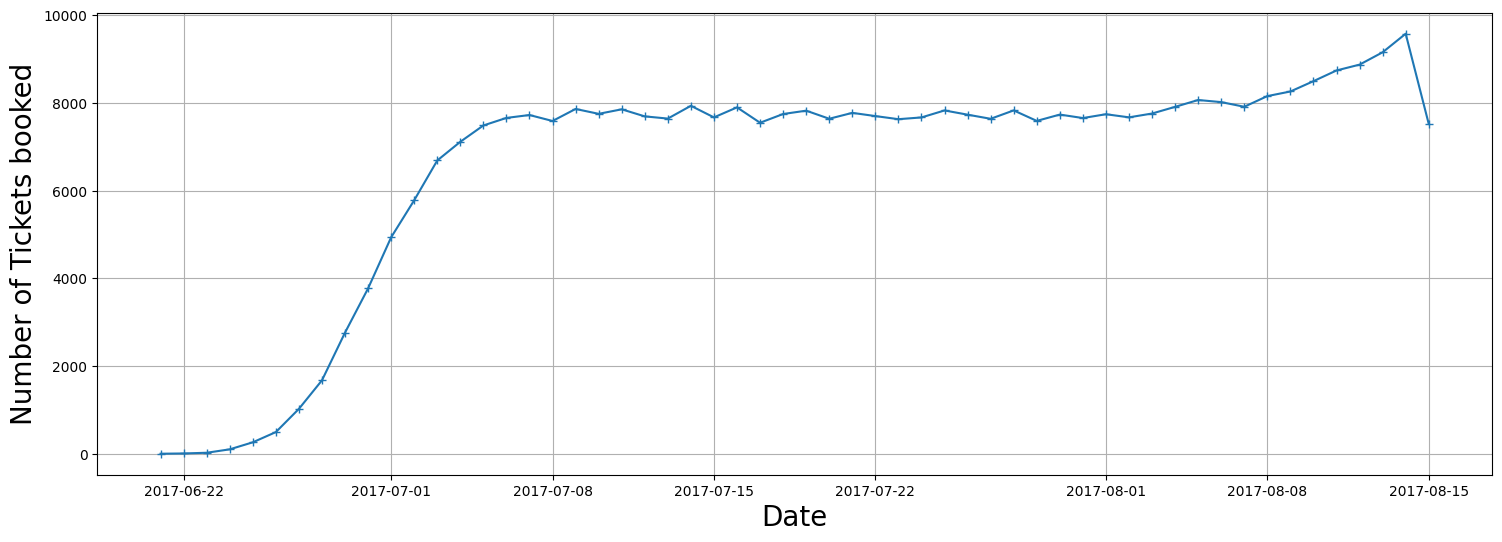

In [21]:
x = tickets.groupby('date')[['date']].count()
plt.figure(figsize = (18,6))
plt.plot(x.index, x['date'], marker = '+')
plt.xlabel("Date", fontsize = 20)
plt.ylabel("Number of Tickets booked", fontsize = 20)
plt.grid('b')

In [22]:
bookings = pd.read_sql_query("""select * from bookings""", connection)

In [23]:
bookings['book_date'] = pd.to_datetime(bookings['book_date'])
bookings['date'] = bookings['book_date'].dt.date
x = bookings.groupby('date')[['total_amount']].sum()


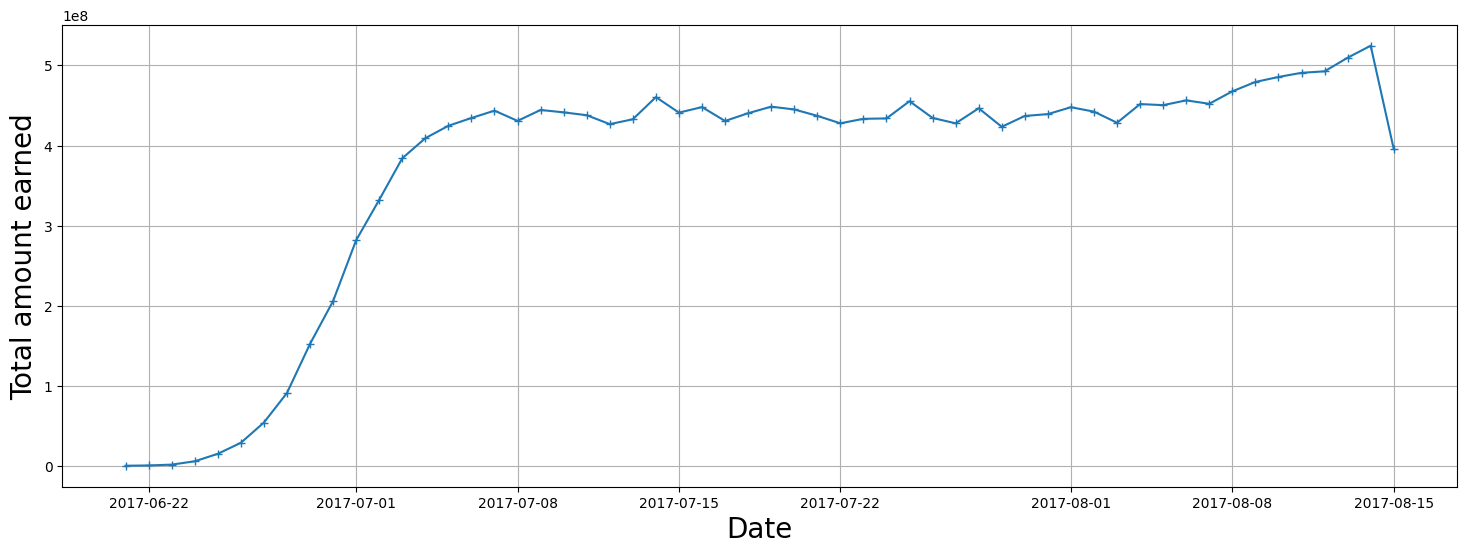

In [24]:
plt.figure(figsize = (18,6))
plt.plot(x.index, x['total_amount'], marker = '+')
plt.xlabel("Date", fontsize = 20)
plt.ylabel("Total amount earned", fontsize = 20)
plt.grid('b')

Average charges for each aircraft with different fare conditions

In [25]:
df = pd.read_sql_query("""select fare_conditions,aircraft_code, avg(amount) from ticket_flights tf join flights f on tf.flight_id = f.flight_id group by aircraft_code, fare_conditions """, connection)
df

,fare_conditions,aircraft_code,avg(amount)
0,Business,319,113550.557703
1,Economy,319,38311.402347
2,Business,321,34435.662664
3,Economy,321,11534.974764
4,Business,733,41865.626175
5,Economy,733,13985.152000
6,Business,763,82839.842866
7,Economy,763,27594.721829
8,Business,773,57779.909435
9,Comfort,773,32740.552889


<Axes: xlabel='aircraft_code', ylabel='avg(amount)'>

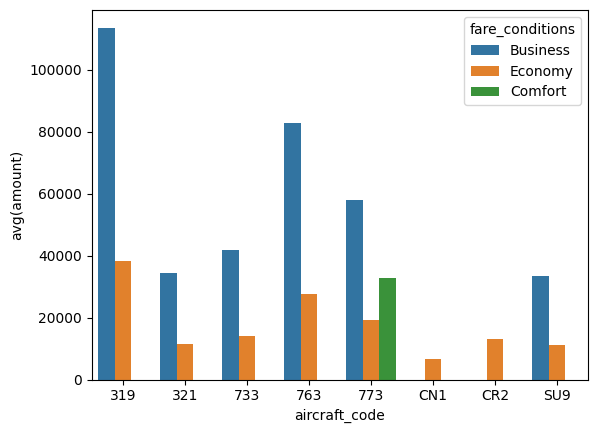

In [26]:
sns.barplot(data = df, x = 'aircraft_code', y = 'avg(amount)', hue = 'fare_conditions')

**Analyzing occupancy rate**

1. For each aircraft calculate total revenue per year and average revenue per ticket

In [27]:
pd.read_sql_query("""select
aircraft_code,
ticket_count,
total_revenue, total_revenue/ticket_count as average_revenue_per_ticket from (select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights tf join flights f on tf.flight_id = f.flight_id
group by aircraft_code)""", connection)

,aircraft_code,ticket_count,total_revenue,average_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


Average occupancy per aircraft.

In [28]:
occupancy_rate = pd.read_sql_query("""select a.aircraft_code, avg(a.seats_count) as booked_seats, b.num_seats, avg(a.seats_count)/b.num_seats as occupancy_rate  from (
select aircraft_code, f.flight_id, count(*) as seats_count from boarding_passes bp 
inner join flights f on bp.flight_id = f.flight_id group by aircraft_code, f.flight_id)
as a 
inner join( select aircraft_code, count(*) as num_seats from seats group by aircraft_code) as b
on a.aircraft_code=b.aircraft_code group by a.aircraft_code""", connection)

On increase in occupancy rates by 10%

In [29]:
 occupancy_rate['Inc occupancy rate'] = occupancy_rate['occupancy_rate']+occupancy_rate['occupancy_rate']*0.1

In [30]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate
0,319,53.583181,116,0.461924,0.508116
1,321,88.809231,170,0.522407,0.574648
2,733,80.255462,130,0.617350,0.679085
3,763,113.937294,222,0.513231,0.564554
4,773,264.925806,402,0.659019,0.724921
5,CN1,6.004431,12,0.500369,0.550406
6,CR2,21.482847,50,0.429657,0.472623
7,SU9,56.812113,97,0.585692,0.644261


In [31]:
total_revenue = pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue from ticket_flights tf
join flights f on tf.flight_id = f.flight_id group by aircraft_code""", connection)

total_revenue

,aircraft_code,total_revenue
0,319,2706163100
1,321,1638164100
2,733,1426552100
3,763,4371277100
4,773,3431205500
5,CN1,96373800
6,CR2,1982760500
7,SU9,5114484700


In [32]:
pd.set_option("display.float_format", str)

In [33]:
occupancy_rate['Inc Total Annual Turnover'] = (total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])* occupancy_rate['Inc occupancy rate']

occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Inc Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999
